 IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
dt=pd.read_csv("/content/energy_dataset.csv")

In [ ]:
dt

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2015-01-31 18:00:00+01:00,382.0,0.0,0.0,3415.0,1269.0,200.0,0.0,0.0,0.0,...,172.0,0.0,14644.0,258,NaN,14685,30797,30555.0,22.33,43.11
739,2015-01-31 19:00:00+01:00,373.0,0.0,0.0,3922.0,1320.0,205.0,0.0,0.0,0.0,...,182.0,0.0,14280.0,108,NaN,14335,33007,32787.0,35.62,52.36
740,2015-01-31 20:00:00+01:00,369.0,0.0,0.0,4206.0,1375.0,205.0,0.0,0.0,0.0,...,183.0,0.0,14069.0,77,NaN,14272,33550,33309.0,40.40,57.46
741,2015-01-31 21:00:00+01:00,369.0,0.0,0.0,4354.0,1365.0,206.0,0.0,0.0,0.0,...,187.0,0.0,13581.0,49,NaN,13634,33252,32984.0,37.54,55.32


CLEANING THE DATA

In [ ]:
dt.time

0      2015-01-01 00:00:00+01:00
1      2015-01-01 01:00:00+01:00
2      2015-01-01 02:00:00+01:00
3      2015-01-01 03:00:00+01:00
4      2015-01-01 04:00:00+01:00
                 ...            
738    2015-01-31 18:00:00+01:00
739    2015-01-31 19:00:00+01:00
740    2015-01-31 20:00:00+01:00
741    2015-01-31 21:00:00+01:00
742    2015-01-31 22:00:00+01:00
Name: time, Length: 743, dtype: object

In [ ]:
dt.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [ ]:
dt.tail()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
738,2015-01-31 18:00:00+01:00,382.0,0.0,0.0,3415.0,1269.0,200.0,0.0,0.0,0.0,...,172.0,0.0,14644.0,258,NaN,14685,30797,30555.0,22.33,43.11
739,2015-01-31 19:00:00+01:00,373.0,0.0,0.0,3922.0,1320.0,205.0,0.0,0.0,0.0,...,182.0,0.0,14280.0,108,NaN,14335,33007,32787.0,35.62,52.36
740,2015-01-31 20:00:00+01:00,369.0,0.0,0.0,4206.0,1375.0,205.0,0.0,0.0,0.0,...,183.0,0.0,14069.0,77,NaN,14272,33550,33309.0,40.40,57.46
741,2015-01-31 21:00:00+01:00,369.0,0.0,0.0,4354.0,1365.0,206.0,0.0,0.0,0.0,...,187.0,0.0,13581.0,49,NaN,13634,33252,32984.0,37.54,55.32
742,2015-01-31 22:00:00+01:00,365.0,0.0,0.0,4007.0,1358.0,206.0,0.0,0.0,0.0,...,186.0,0.0,13380.0,46,NaN,13412,31609,31484.0,34.60,56.16


In [ ]:
dt.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,732.000000,732.000000,732.0,732.000000,732.000000,732.000000,732.0,732.0,732.0,0.0,...,732.000000,732.0,732.000000,743.000000,0.0,743.000000,743.000000,736.000000,743.000000,743.000000
mean,483.896175,573.633880,0.0,4852.278689,5416.831967,306.157104,0.0,0.0,0.0,NaN,...,228.924863,0.0,7579.689891,1124.312248,NaN,7585.802153,30121.624495,29999.531250,47.456743,64.980592
std,52.850616,380.163259,0.0,1611.677542,2281.552696,65.471425,0.0,0.0,0.0,NaN,...,32.147209,0.0,3537.769586,1488.548716,NaN,3502.663522,5345.251432,5292.827571,16.293477,15.420873
min,334.000000,0.000000,0.0,2115.000000,940.000000,147.000000,0.0,0.0,0.0,NaN,...,140.000000,0.0,470.000000,0.000000,NaN,483.000000,19430.000000,19126.000000,4.000000,13.480000
25%,454.000000,172.000000,0.0,3823.250000,3838.000000,264.000000,0.0,0.0,0.0,NaN,...,210.000000,0.0,5142.000000,14.500000,NaN,5213.000000,25155.500000,25195.500000,36.940000,53.675000
50%,492.000000,651.500000,0.0,4446.000000,5934.000000,318.500000,0.0,0.0,0.0,NaN,...,228.000000,0.0,7716.500000,280.000000,NaN,7779.000000,29902.000000,29872.500000,48.620000,66.700000
75%,528.000000,931.000000,0.0,5530.500000,7387.500000,358.000000,0.0,0.0,0.0,NaN,...,260.000000,0.0,9616.500000,2032.000000,NaN,9592.500000,34926.000000,34708.750000,61.000000,77.050000
max,578.000000,982.000000,0.0,12693.000000,8258.000000,439.000000,0.0,0.0,0.0,NaN,...,284.000000,0.0,17436.000000,5765.000000,NaN,17430.000000,40082.000000,40232.000000,81.120000,100.450000


In [ ]:
dt.shape

(743, 29)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         743 non-null    object 
 1   generation biomass                           732 non-null    float64
 2   generation fossil brown coal/lignite         732 non-null    float64
 3   generation fossil coal-derived gas           732 non-null    float64
 4   generation fossil gas                        732 non-null    float64
 5   generation fossil hard coal                  732 non-null    float64
 6   generation fossil oil                        732 non-null    float64
 7   generation fossil oil shale                  732 non-null    float64
 8   generation fossil peat                       732 non-null    float64
 9   generation geothermal                        732 non-null    float64
 10  ge

In [ ]:
dt.isnull().sum()

time                                             0
generation biomass                              11
generation fossil brown coal/lignite            11
generation fossil coal-derived gas              11
generation fossil gas                           11
generation fossil hard coal                     11
generation fossil oil                           11
generation fossil oil shale                     11
generation fossil peat                          11
generation geothermal                           11
generation hydro pumped storage aggregated     743
generation hydro pumped storage consumption     11
generation hydro run-of-river and poundage      11
generation hydro water reservoir                11
generation marine                               11
generation nuclear                              11
generation other                                11
generation other renewable                      11
generation solar                                11
generation waste               

In [ ]:
dt.drop(columns=['generation hydro pumped storage aggregated'], inplace=True)


In [ ]:
dt.drop(columns=['forecast wind offshore eday ahead'], inplace=True)


In [ ]:
dt.isnull().sum()

time                                            0
generation biomass                             11
generation fossil brown coal/lignite           11
generation fossil coal-derived gas             11
generation fossil gas                          11
generation fossil hard coal                    11
generation fossil oil                          11
generation fossil oil shale                    11
generation fossil peat                         11
generation geothermal                          11
generation hydro pumped storage consumption    11
generation hydro run-of-river and poundage     11
generation hydro water reservoir               11
generation marine                              11
generation nuclear                             11
generation other                               11
generation other renewable                     11
generation solar                               11
generation waste                               11
generation wind offshore                       11


In [ ]:
dt=dt.dropna()

In [ ]:
dt.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [ ]:
dt.count()

time                                           732
generation biomass                             732
generation fossil brown coal/lignite           732
generation fossil coal-derived gas             732
generation fossil gas                          732
generation fossil hard coal                    732
generation fossil oil                          732
generation fossil oil shale                    732
generation fossil peat                         732
generation geothermal                          732
generation hydro pumped storage consumption    732
generation hydro run-of-river and poundage     732
generation hydro water reservoir               732
generation marine                              732
generation nuclear                             732
generation other                               732
generation other renewable                     732
generation solar                               732
generation waste                               732
generation wind offshore       

In [ ]:
dt.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation

In [ ]:
dt['price actual'].value_counts()

78.95    3
51.88    3
52.15    3
83.04    3
77.05    3
        ..
55.59    1
77.60    1
82.29    1
82.47    1
56.16    1
Name: price actual, Length: 678, dtype: int64

In [ ]:
dt['time'].value_counts()

2015-01-01 00:00:00+01:00    1
2015-01-21 10:00:00+01:00    1
2015-01-21 12:00:00+01:00    1
2015-01-21 13:00:00+01:00    1
2015-01-21 14:00:00+01:00    1
                            ..
2015-01-11 12:00:00+01:00    1
2015-01-11 13:00:00+01:00    1
2015-01-11 14:00:00+01:00    1
2015-01-11 15:00:00+01:00    1
2015-01-31 22:00:00+01:00    1
Name: time, Length: 732, dtype: int64

In this element finding the length and type

PLOTTING

<Axes: xlabel='generation fossil gas'>

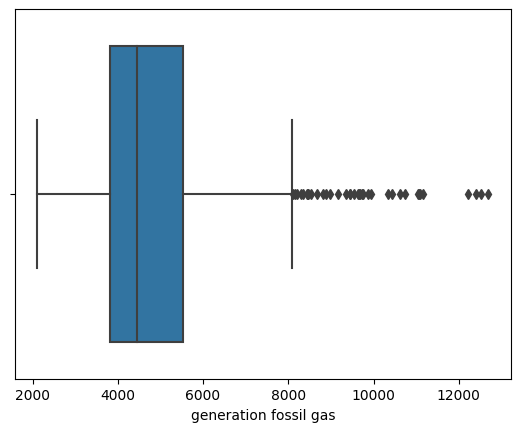

In [ ]:
sns.boxplot(x= 'generation fossil gas',data=dt)

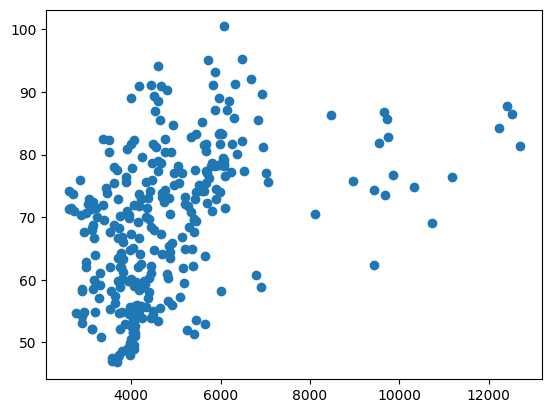

In [ ]:
x= 'generation fossil gas'
y= 'price actual'
plt.scatter(dt[x].head(300),dt[y].head(300))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'generation biomass'),
  Text(1, 0, 'generation fossil brown coal/lignite'),
  Text(2, 0, 'generation fossil coal-derived gas'),
  Text(3, 0, 'generation fossil gas'),
  Text(4, 0, 'generation fossil hard coal'),
  Text(5, 0, 'generation fossil oil'),
  Text(6, 0, 'generation fossil oil shale'),
  Text(7, 0, 'generation fossil peat'),
  Text(8, 0, 'generation geothermal'),
  Text(9, 0, 'generation hydro pumped storage consumption'),
  Text(10, 0, 'generation hydro run-of-river and poundage'),
  Text(11, 0, 'generation hydro water reservoir'),
  Text(12, 0, 'generation marine'),
  Text(13, 0, 'generation nuclear'),
  Text(14, 0, 'generation other'),
  Text(15, 0, 'generation other renewable'),
  Text(16, 0, 'generation solar'),
  Text(17, 0, 'generation waste'),
  Text(18, 0, 'generation wind offshore'),
  Text(19, 0, 'generation wind onshore'),
  Text(2

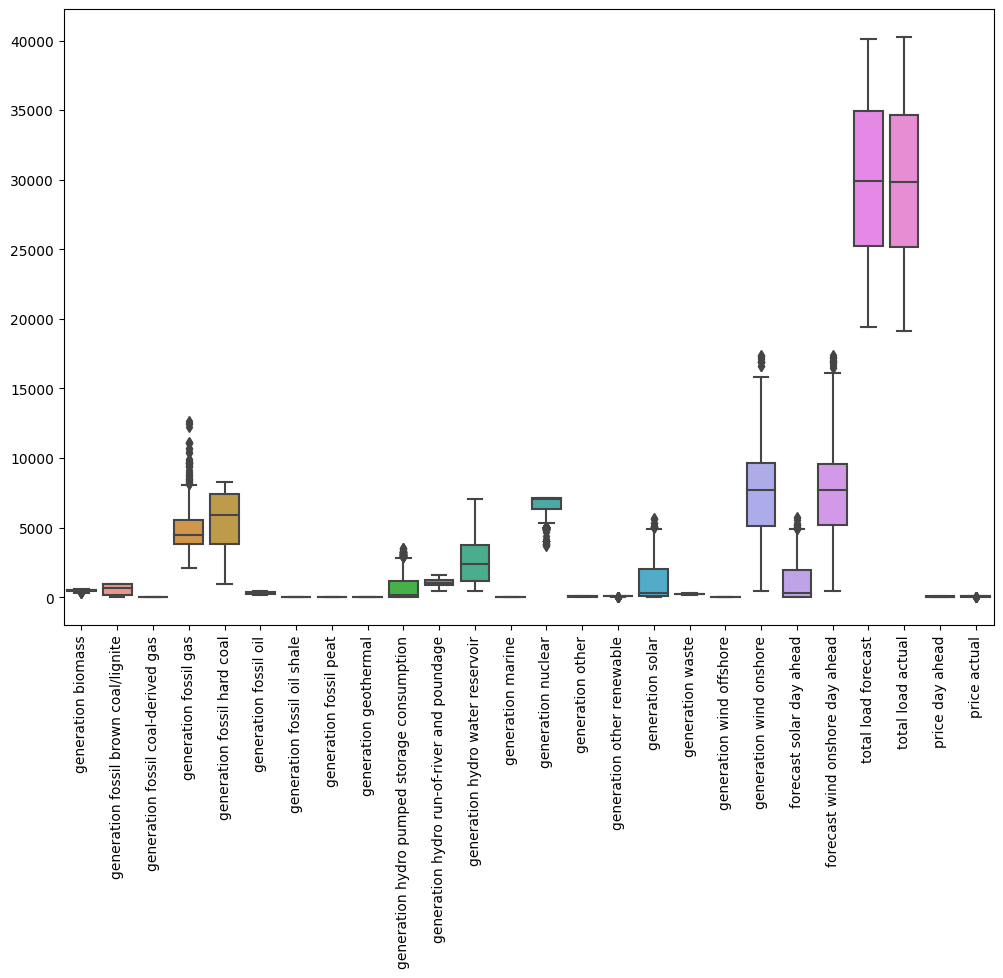

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dt,orient='v')
plt.xticks(rotation=90)


<Axes: xlabel='price actual'>

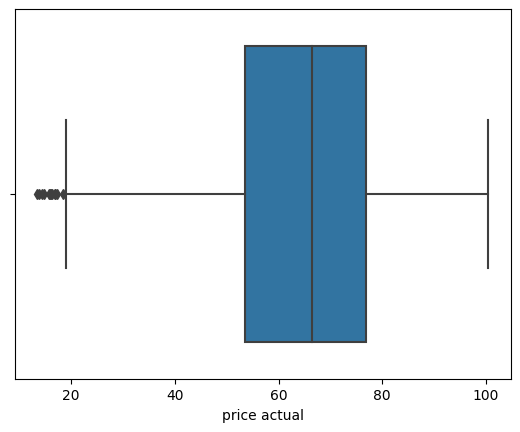

In [ ]:
sns.boxplot(x='price actual',data=dt)

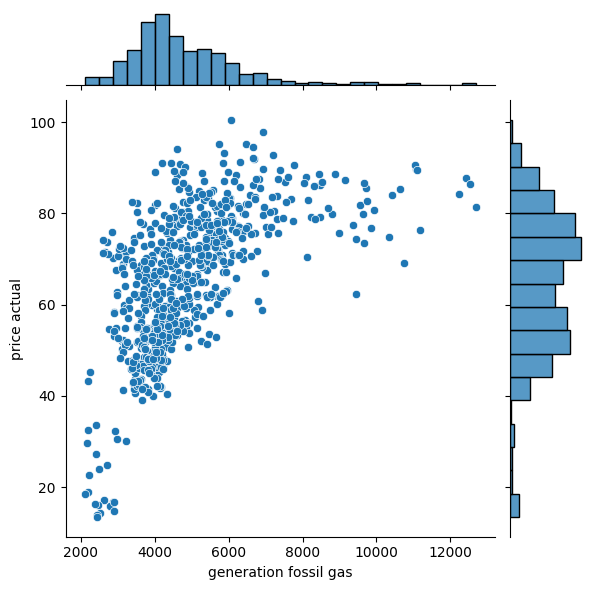

In [ ]:
sns.jointplot(x='generation fossil gas',y='price actual',data=dt)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

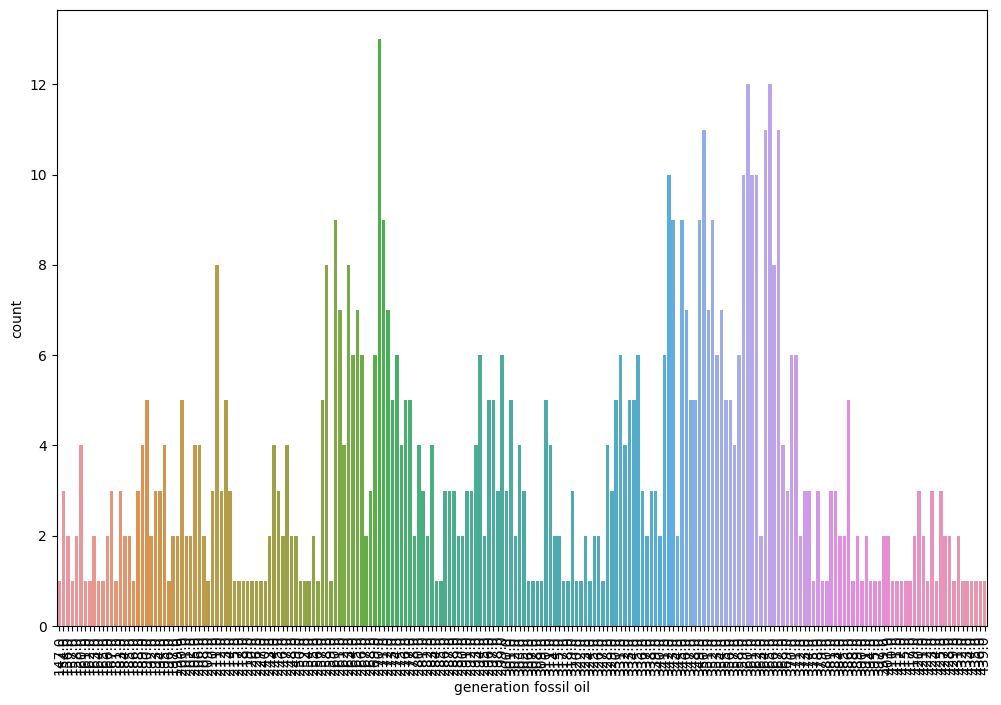

In [ ]:
# count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='generation fossil oil', data=dt)
plt.xticks(rotation=90)

from this count plot 'genration fossil oil'element we can say that highest value at above 12 it shows

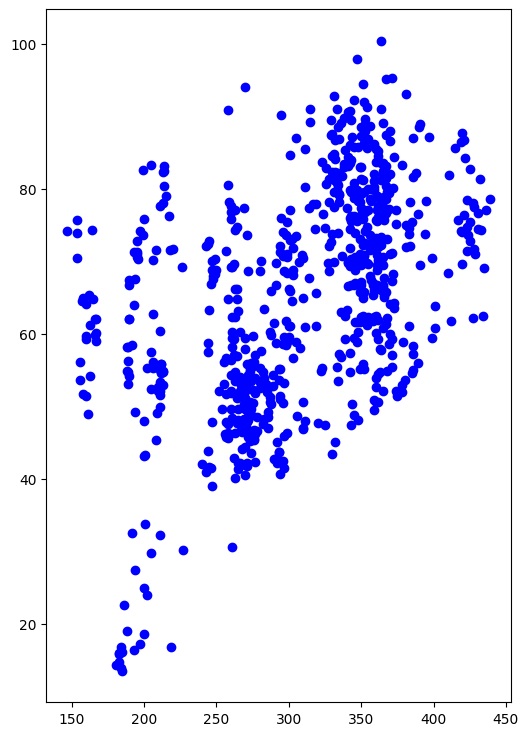

In [ ]:
plt.figure(figsize=(6,9))
plt.scatter(dt['generation fossil oil'],dt['price actual'], color='blue')

<ipython-input-32-3ba6ae8a1585>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(),annot=True,linewidths=0.1,linecolor='w')


<Axes: >

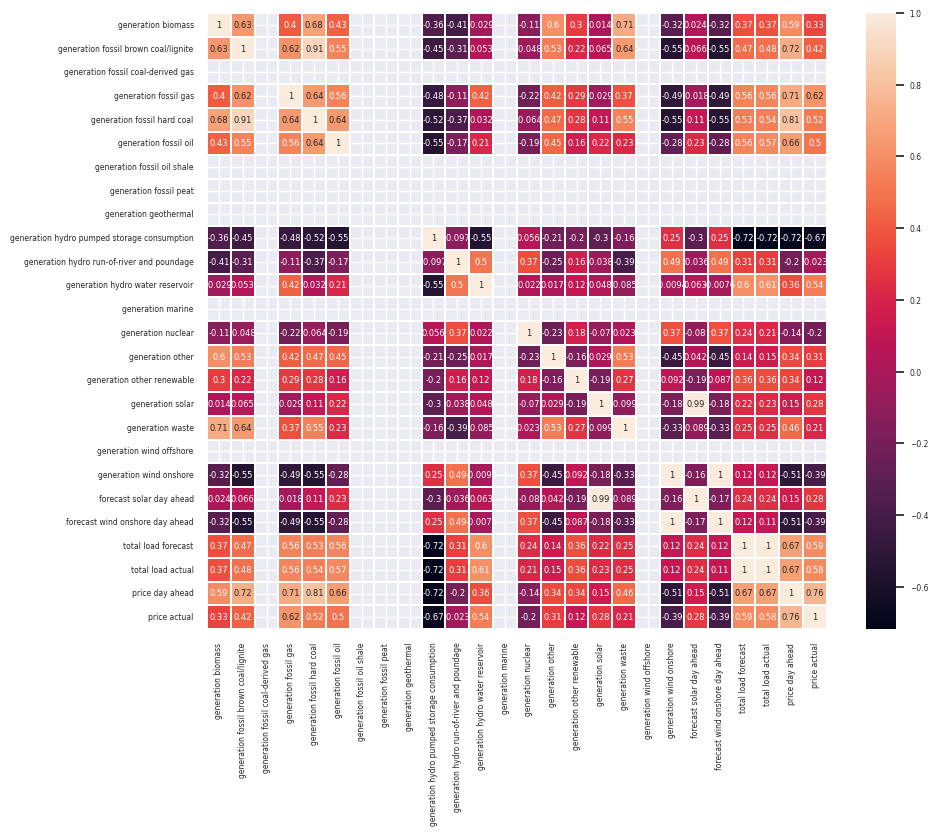

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.set(font_scale=0.5)
sns.heatmap(dt.corr(),annot=True,linewidths=0.1,linecolor='w')

In [ ]:
dt['time'] = pd.to_datetime(dt['time'],utc=True)
dt['time']

<ipython-input-33-ae679079278d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['time'] = pd.to_datetime(dt['time'],utc=True)


0     2014-12-31 23:00:00+00:00
1     2015-01-01 00:00:00+00:00
2     2015-01-01 01:00:00+00:00
3     2015-01-01 02:00:00+00:00
4     2015-01-01 03:00:00+00:00
                 ...           
738   2015-01-31 17:00:00+00:00
739   2015-01-31 18:00:00+00:00
740   2015-01-31 19:00:00+00:00
741   2015-01-31 20:00:00+00:00
742   2015-01-31 21:00:00+00:00
Name: time, Length: 732, dtype: datetime64[ns, UTC]

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 742
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         732 non-null    datetime64[ns, UTC]
 1   generation biomass                           732 non-null    float64            
 2   generation fossil brown coal/lignite         732 non-null    float64            
 3   generation fossil coal-derived gas           732 non-null    float64            
 4   generation fossil gas                        732 non-null    float64            
 5   generation fossil hard coal                  732 non-null    float64            
 6   generation fossil oil                        732 non-null    float64            
 7   generation fossil oil shale                  732 non-null    float64            
 8   generation fossil peat        

 Testing For Stationarity


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(dt['price actual'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(priceactual):
    result=adfuller(priceactual)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(dt['price actual'])

ADF Test Statistic : -0.1875954761854846
p-value : 0.9399841418423717
#Lags Used : 20
Number of Observations Used : 711
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [ ]:
dt['Sales First Difference'] = dt['price actual'] - dt['price actual'].shift(1)

<ipython-input-39-b420961a678a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Sales First Difference'] = dt['price actual'] - dt['price actual'].shift(1)


In [ ]:
dt['price actual'].shift(1)

0        NaN
1      65.41
2      64.92
3      64.48
4      59.32
       ...  
738    23.93
739    43.11
740    52.36
741    57.46
742    55.32
Name: price actual, Length: 732, dtype: float64

In [ ]:
dt['Seasonal First Difference']=dt['price actual']-dt['price actual'].shift(12)

<ipython-input-41-17c4bfd0be30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Seasonal First Difference']=dt['price actual']-dt['price actual'].shift(12)


In [ ]:
dt.head(30)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Sales First Difference,Seasonal First Difference
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0.0,6378.0,17,6436,26118,25385.0,50.10,65.41,NaN,NaN
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0.0,5890.0,16,5856,24934,24382.0,48.10,64.92,-0.49,NaN
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0.0,5461.0,8,5454,23515,22734.0,47.33,64.48,-0.44,NaN
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0.0,5238.0,2,5151,22642,21286.0,42.27,59.32,-5.16,NaN
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0.0,4935.0,9,4861,21785,20264.0,38.41,56.04,-3.28,NaN
5,2015-01-01 04:00:00+00:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,...,0.0,4618.0,4,4617,21441,19905.0,35.72,53.63,-2.41,NaN
6,2015-01-01 05:00:00+00:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,...,0.0,4397.0,3,4276,21285,20010.0,35.13,51.73,-1.90,NaN
7,2015-01-01 06:00:00+00:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,...,0.0,3992.0,12,3994,21545,20377.0,36.22,51.43,-0.30,NaN
8,2015-01-01 07:00:00+00:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,...,0.0,3629.0,39,3602,21443,20094.0,32.40,48.98,-2.45,NaN
9,2015-01-01 08:00:00+00:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,...,0.0,3073.0,784,3212,21560,20637.0,36.60,54.20,5.22,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(dt['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.014222319451102
p-value : 1.547451786499196e-07
#Lags Used : 13
Number of Observations Used : 706
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

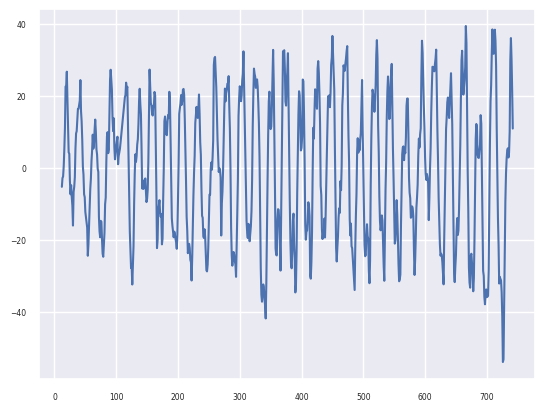

In [ ]:
dt['Seasonal First Difference'].plot()

Autocoreelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

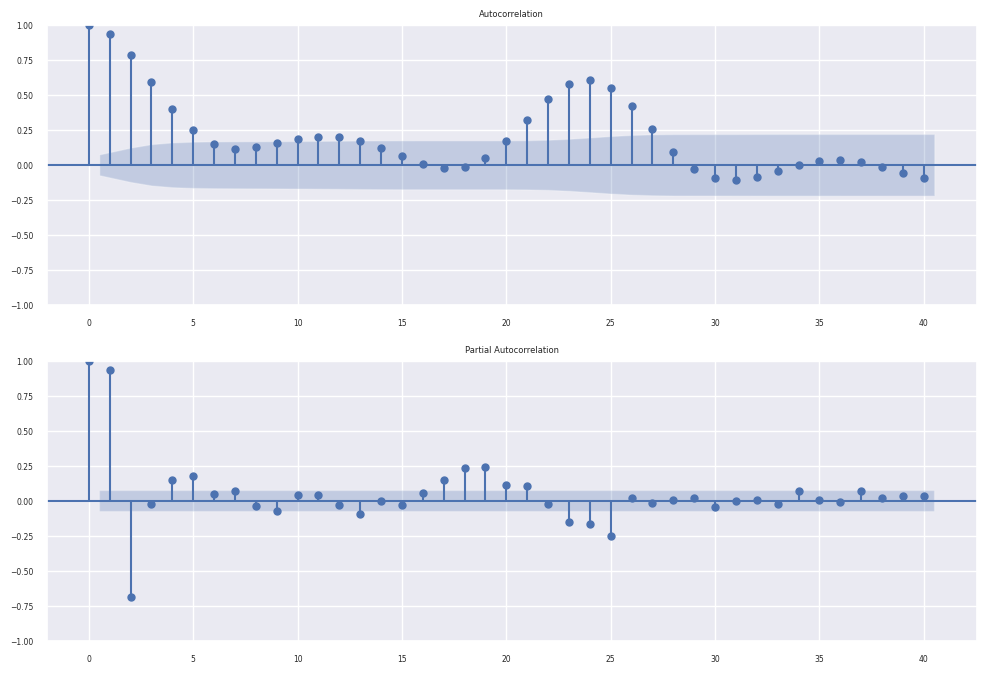

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dt['price actual'].iloc[31:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dt['price actual'].iloc[31:],lags=40,ax=ax2)

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(dt['price actual'],order=(4, 1, 2),seasonal_order=(1,1,1,30))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [dt.iloc[-1]["time"] + DateOffset(months= x) for x in range (0,5)]

In [ ]:
future_datest_dt=pd.DataFrame(index=future_dates[1:],columns=dt.columns)

In [ ]:
future_datest_dt.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Sales First Difference,Seasonal First Difference
2015-02-28 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_dt=pd.concat([dt,future_datest_dt])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

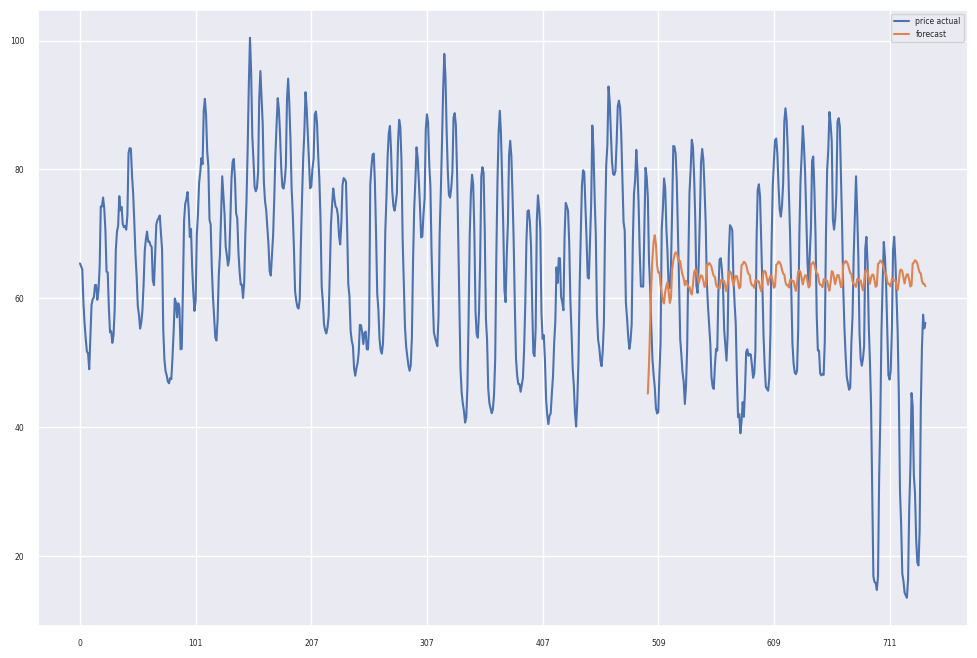

In [ ]:
future_dt['forecast'] = results.predict(start = 500, end = 900, dynamic= True)
future_dt[['price actual', 'forecast']].plot(figsize=(12, 8))